# **Telecom X: Previsão de Churn com Machine Learning**  

## **Visão Geral do Projeto**  
Este desafio foca na **construção de modelos preditivos** para antecipar a evasão de clientes (*churn*) em uma operadora de telecomunicações. Utilizando dados pré-processados (ETL - Parte 1), o projeto abrange desde análise exploratória até a implantação de algoritmos de classificação, com o objetivo de:  
- **Identificar padrões** críticos nos dados.  
- **Prever riscos de churn** com métricas mensuráveis.  
- **Gerar insights acionáveis** para a equipe de retenção.  

---

## **Destaques do Fluxo de Trabalho**  
### 🔎 **Análise Exploratória (EDA)**  
- Correlações entre variáveis (ex: tempo de contrato vs. churn).  
- Visualização de perfis de clientes (fiéis vs. evadidos).  

### ⚙️ **Pré-processamento**  
- Codificação de variáveis categóricas (*One-Hot Encoding*).  
- Normalização de dados numéricos.  
- Divisão estratificada (treino/teste).  

### 🤖 **Modelagem Preditiva**  
- **Algoritmos testados**:  
  - *Baseline*: Regressão Logística.  
  - *Comparação*: Random Forest e XGBoost.  
- **Métricas de avaliação**:  
  - Precisão, Recall, AUC-ROC, Matriz de Confusão.  

### 📈 **Resultados e Ações**  
- Importância das features (SHAP/Feature Importance).  
- Recomendações baseadas em dados (ex: "Clientes com contrato mensal têm 3x mais churn").  

---

## **Estrutura do Repositório**  
```
TELECOM-X2/
├── data/
│   ├── raw/                    # Dados originais
│   └── processed/              # Dados tratados (CSV/Parquet)
├── notebooks/
│   ├── EDA.ipynb               # Análise exploratória
│   └── Modelagem.ipynb         # Treino e avaliação
├── visualizations/             # Gráficos exportados
├── .gitignore                  # Configuração do Git
├── README.md                   # Documentação
└── task.md                     # Requisitos do desafio
```

---

## **Ferramentas e Tecnologias**  
- **Linguagem**: Python.  
- **Bibliotecas**: Pandas, Scikit-Learn, XGBoost, Matplotlib/Seaborn.  
- **Versionamento**: Git/GitHub.  
- **Ambiente**: Jupyter Notebook ou Google Colab.  

---

## **Próximos Passos**  
1. **Carregar dados** e validar qualidade.  
2. **Explorar correlações** com heatmaps e histogramas.  
3. **Treinar modelos** e comparar performance.  
4. **Documentar insights** no README.  

**Objetivo Final**: Entregar um pipeline reprodutível para prever churn, com impacto mensurável na redução de evasão.  

# 🛠️ **Preparação dos Dados para o Projeto Telecom X: Previsão de Churn**

Etapa de preparação dos dados para o projeto de previsão de churn. Vamos seguir as etapas mencionadas de forma estruturada.

## **1. Extração do Arquivo Tratado**


In [25]:
import pandas as pd

# Carregar o arquivo CSV tratado
try:
    df = pd.read_csv('https://raw.githubusercontent.com/anandamatos/telecom-x2/refs/heads/master/data/dados_sem_colunas_irrelevantes.csv')
    print("Dados carregados com sucesso!")
    print(f"Shape do DataFrame: {df.shape}")
    print("\nPrimeiras linhas do dataset:")
    display(df.head())
except FileNotFoundError:
    print("Arquivo não encontrado. Verifique o caminho ou execute primeiro a etapa de ETL.")

Dados carregados com sucesso!
Shape do DataFrame: (7267, 20)

Primeiras linhas do dataset:


,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,No,Feale,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## 2. Remoção de Colunas Irrelevantes

In [26]:
# Identificar colunas que não contribuem para a análise preditiva
cols_to_drop = ['customerID', 'Unnamed: 0']  # Exemplo - ajuste conforme seu dataset

# Manter apenas colunas relevantes
df_clean = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

print(f"Colunas removidas: {[col for col in cols_to_drop if col in df.columns]}")
print(f"Novo shape do DataFrame: {df_clean.shape}")

Colunas removidas: []
Novo shape do DataFrame: (7267, 20)


## 3. Encoding de Variáveis Categóricas


In [29]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# 1. Carregar os dados limpos novamente
df_clean = pd.read_csv('https://raw.githubusercontent.com/anandamatos/telecom-x2/refs/heads/master/data/dados_sem_colunas_irrelevantes.csv')

# 2. Separar a variável target ANTES do encoding
target = df_clean['Churn']  # Assumindo que 'Churn' é a coluna target
df_features = df_clean.drop(columns=['Churn'])

# 3. Identificar colunas categóricas VERDADEIRAS (evitando vazamento de dados)
true_categoricals = [
    'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
]  # Ajuste conforme suas colunas

# 4. Filtrar apenas colunas que existem no DataFrame
true_categoricals = [col for col in true_categoricals if col in df_features.columns]

# 5. Aplicar one-hot encoding apenas nas colunas categóricas selecionadas
df_encoded = pd.get_dummies(
    df_features,
    columns=true_categoricals,
    drop_first=True,  # Reduz dimensionalidade eliminando uma categoria por feature
    dtype='int8'     # Economiza memória usando int8 em vez de bool
)

# 6. Adicionar a variável target de volta
df_encoded['Churn'] = target

# 7. Verificar resultado
print("\nDataset após encoding inteligente:")
print(f"Shape: {df_encoded.shape}")
display(df_encoded.head())


Dataset após encoding inteligente:
Shape: (7267, 20)


,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Churn
0,Feale,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,No
1,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,No
2,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Yes
3,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes
4,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,Yes


## 4. Verificação da Proporção de Evasão


Proporção de Churn:
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


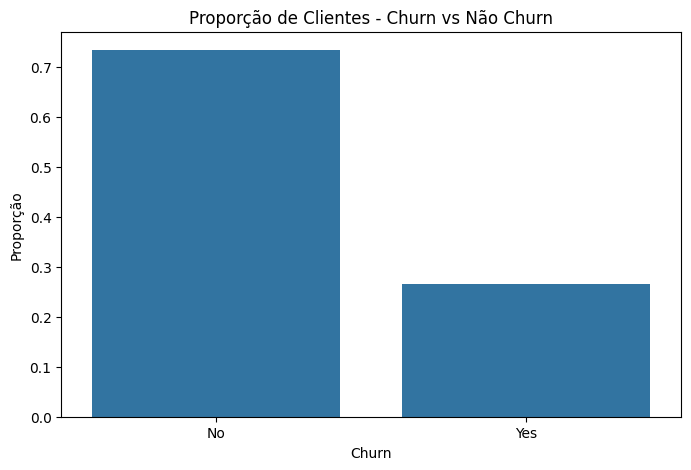

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Verificar proporção da variável target (assumindo que se chama 'Churn')
target_col = 'Churn'  # Ajuste conforme seu dataset
if target_col in df_encoded.columns:
    churn_counts = df_encoded[target_col].value_counts(normalize=True)

    print("\nProporção de Churn:")
    print(churn_counts)

    # Visualização
    plt.figure(figsize=(8, 5))
    sns.barplot(x=churn_counts.index, y=churn_counts.values)
    plt.title('Proporção de Clientes - Churn vs Não Churn')
    plt.ylabel('Proporção')
    plt.xlabel('Churn')
    plt.show()
else:
    print(f"Variável target '{target_col}' não encontrada no dataset.")

## 5. Balanceamento de Classes (Opcional)

In [34]:
# Verificar valores NaN no dataset
print("Valores NaN por coluna:")
print(X.isna().sum())

# Opção 1: Remover linhas com NaN (se poucas)
df_encoded = df_encoded.dropna()

# Opção 2: Preencher NaN (depende da natureza dos dados)
# Para numéricos:
# X = X.fillna(X.mean())
# Para categóricos:
# X = X.fillna(X.mode().iloc[0])

Valores NaN por coluna:
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [35]:
# Verificar se a target tem valores NaN
print("\nValores NaN na target:", y.isna().sum())

# Se houver NaN na target, remover as linhas correspondentes
if y.isna().sum() > 0:
    valid_indices = y.dropna().index
    X = X.loc[valid_indices]
    y = y.loc[valid_indices]


Valores NaN na target: 224


In [37]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# 1. Verificar e tratar colunas categóricas restantes
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

if categorical_cols:
    print(f"Colunas categóricas encontradas: {categorical_cols}")

    # Opção A: Label Encoding para colunas ordinais
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
        label_encoders[col] = le

    # Opção B: Remover colunas categóricas (se não forem importantes)
    # X = X.drop(columns=categorical_cols)

# 2. Garantir que não há NaN ou strings restantes
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

# 3. Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 4. Aplicar SMOTE corretamente
try:
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    print("\nDistribuição antes do SMOTE:")
    print(y_train.value_counts(normalize=True))

    print("\nDistribuição após SMOTE:")
    print(pd.Series(y_train_smote).value_counts(normalize=True))

    print("\nShapes:")
    print(f"Original - Features: {X_train.shape}, Target: {y_train.shape}")
    print(f"Com SMOTE - Features: {X_train_smote.shape}, Target: {y_train_smote.shape}")

except Exception as e:
    print("\nErro ao aplicar SMOTE:", str(e))
    print("\nVerifique os tipos de dados finais:")
    print(X_train.dtypes)

Colunas categóricas encontradas: ['customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod']

Distribuição antes do SMOTE:
Churn
0.0    0.734647
1.0    0.265353
Name: proportion, dtype: float64

Distribuição após SMOTE:
Churn
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64

Shapes:
Original - Features: (5634, 19), Target: (5634,)
Com SMOTE - Features: (8278, 19), Target: (8278,)


## 6. Normalização/Padronização (Se Necessário)

In [40]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Selecionar apenas colunas numéricas (excluindo variáveis dummy criadas)
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Padronização (StandardScaler)
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

# Aplicar a mesma transformação nos dados de teste
X_test_scaled = X_test.copy()
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("\nDados padronizados (amostra):")
display(X_train_scaled.head())


Dados padronizados (amostra):


,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
3902,-1.015023,-0.438325,1.043175,-0.660136,1.124891,0.321907,1.119184,0.175459,1.411087,1.239199,-1.020830,-0.923446,-1.121533,1.132331,-0.829630,0.821154,-0.534105,0.968250,1.398545
3281,0.983802,-0.438325,-0.958612,1.514839,-0.827880,0.321907,-0.986504,1.535208,0.248627,0.104894,0.114680,0.235541,0.006608,0.004205,1.567363,-1.217798,-1.467753,-1.521717,-0.914899
5071,-1.015023,-0.438325,-0.958612,-0.660136,-1.234707,0.321907,-0.986504,0.175459,1.411087,-1.029411,1.250189,-0.923446,-1.121533,-1.123921,-0.829630,0.821154,0.399543,0.513560,-0.947951
4038,0.983802,-0.438325,1.043175,1.514839,0.026457,0.321907,-0.986504,-1.184290,1.411087,-1.029411,1.250189,-0.923446,1.134748,1.132331,0.368866,-1.217798,-0.534105,0.323690,0.070059
3970,-1.015023,-0.438325,-0.958612,1.514839,-0.746514,0.321907,1.119184,0.175459,1.411087,-1.029411,-1.020830,1.394529,-1.121533,-1.123921,-0.829630,0.821154,1.333191,0.698434,-0.496589


## 7. Salvando os Dados Processados

In [42]:
import os
import pandas as pd

# 1. Definir o caminho base
base_dir = 'data/processed'

# 2. Criar a estrutura de diretórios se não existir
os.makedirs(base_dir, exist_ok=True)

# 3. Verificar se os DataFrames existem
try:
    # Salvar os dados processados
    df_encoded.to_csv(f'{base_dir}/telecom_encoded.csv', index=False)
    X_train_smote.to_csv(f'{base_dir}/X_train_smote.csv', index=False)  # Usando X_train_smote do SMOTE
    X_test.to_csv(f'{base_dir}/X_test.csv', index=False)
    pd.Series(y_train_smote).to_csv(f'{base_dir}/y_train_smote.csv', index=False)  # y_train após SMOTE
    y_test.to_csv(f'{base_dir}/y_test.csv', index=False)

    print("Dados processados salvos com sucesso!")
    print(f"Arquivos salvos em: {os.path.abspath(base_dir)}")

except NameError as e:
    print(f"Erro: {str(e)} - Verifique se todas as variáveis estão definidas")
except Exception as e:
    print(f"Erro ao salvar arquivos: {str(e)}")

Dados processados salvos com sucesso!
Arquivos salvos em: /content/data/processed


# 🎯 Correlação e Seleção de Variáveis
## <div><br class="Apple-interchange-newline">Análise de Correlação</div>

### 1. Análise de Correlação

Primeiro, vamos carregar os dados processados e visualizar a matriz de correlação:


Colunas do DataFrame: ['customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total', 'Churn']
Colunas numéricas disponíveis: ['customer.SeniorCitizen', 'customer.tenure', 'account.Charges.Monthly']


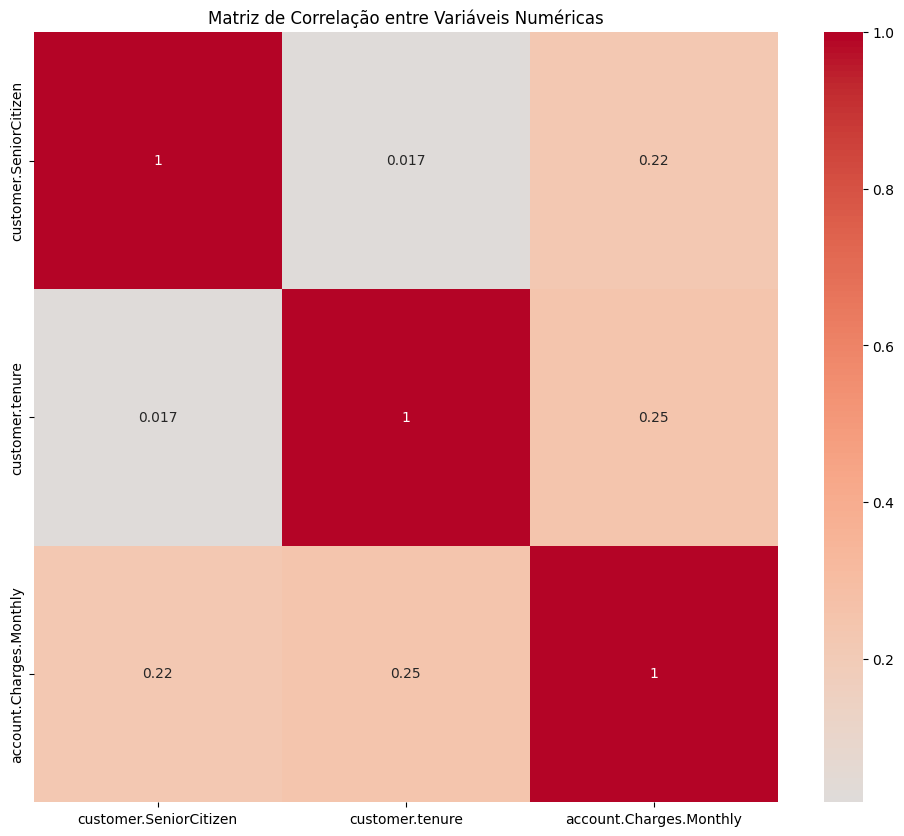


A coluna 'Churn' não está na matriz de correlação.


In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados processados
df = pd.read_csv('data/processed/telecom_encoded.csv')

# Verificar se a coluna Churn existe
print("Colunas do DataFrame:", df.columns.tolist())

# Se a coluna Churn existir, converter para numérico se necessário
if 'Churn' in df.columns and df['Churn'].dtype not in ['int64', 'float64']:
    df['Churn'] = df['Churn'].astype('category').cat.codes

# Verificar as colunas numéricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Colunas numéricas disponíveis:", numeric_cols.tolist())

# Calcular a matriz de correlação
correlation_matrix = df[numeric_cols].corr()

# Plotar o heatmap de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

# Correlação específica com a variável target (Churn)
if 'Churn' in correlation_matrix.columns:
    print("\nCorrelação com Churn:")
    print(correlation_matrix['Churn'].sort_values(ascending=False))
else:
    print("\nA coluna 'Churn' não está na matriz de correlação.")



### 2. Análises Direcionadas

Agora, vamos fazer análises específicas para as relações mais relevantes:

#### a) Tempo de contrato (tenure) × Evasão


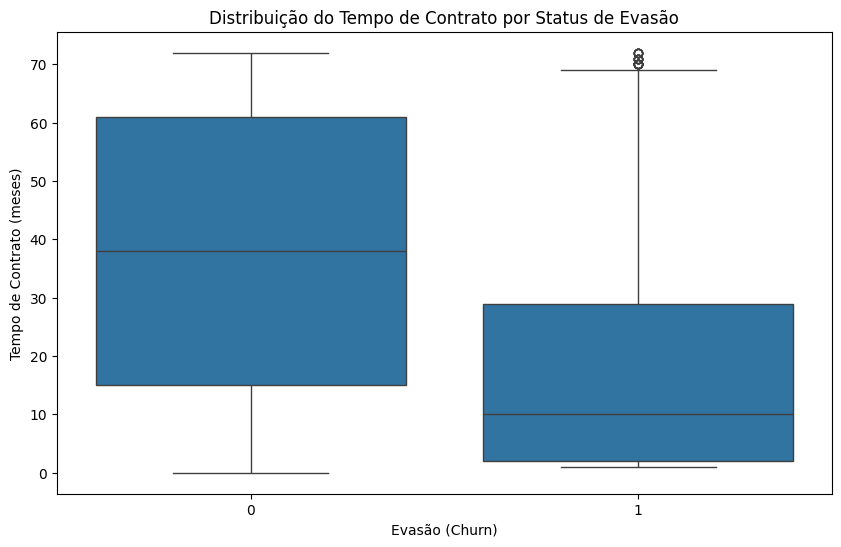

/tmp/ipython-input-73-962658867.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn'] == 1]['customer.tenure'], label='Evasão', shade=True)
/tmp/ipython-input-73-962658867.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn'] == 0]['customer.tenure'], label='Não Evasão', shade=True)


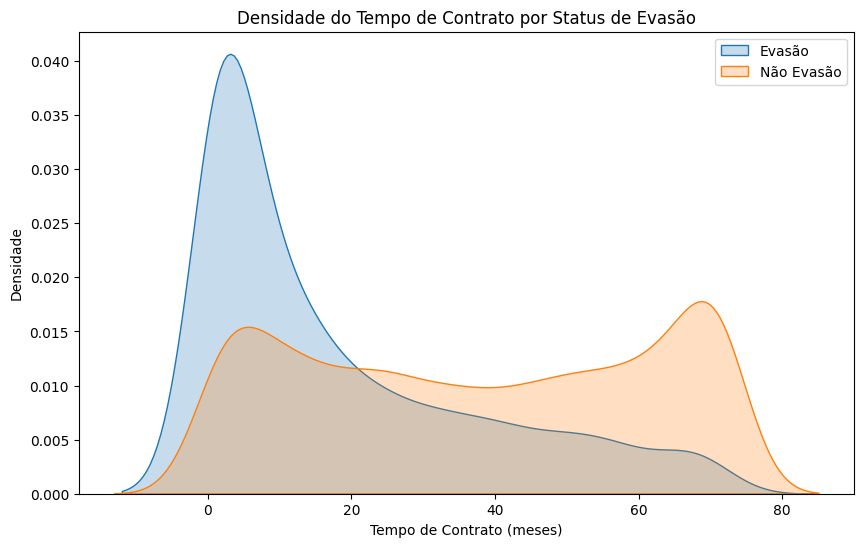

In [73]:

# Boxplot: tenure vs Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='customer.tenure', data=df)
plt.title('Distribuição do Tempo de Contrato por Status de Evasão')
plt.xlabel('Evasão (Churn)')
plt.ylabel('Tempo de Contrato (meses)')
plt.show()

# Gráfico de densidade
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Churn'] == 1]['customer.tenure'], label='Evasão', shade=True)
sns.kdeplot(df[df['Churn'] == 0]['customer.tenure'], label='Não Evasão', shade=True)
plt.title('Densidade do Tempo de Contrato por Status de Evasão')
plt.xlabel('Tempo de Contrato (meses)')
plt.ylabel('Densidade')
plt.legend()
plt.show()

#### b) Total gasto × Evasão


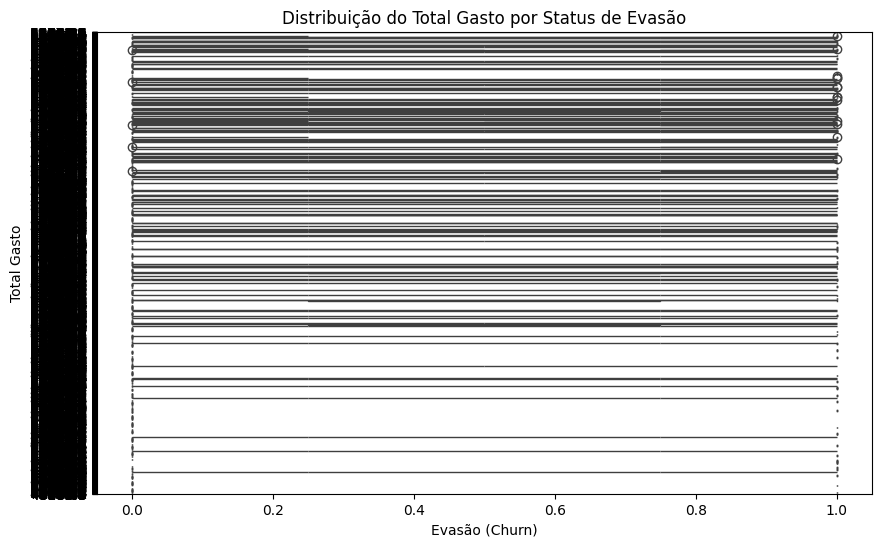

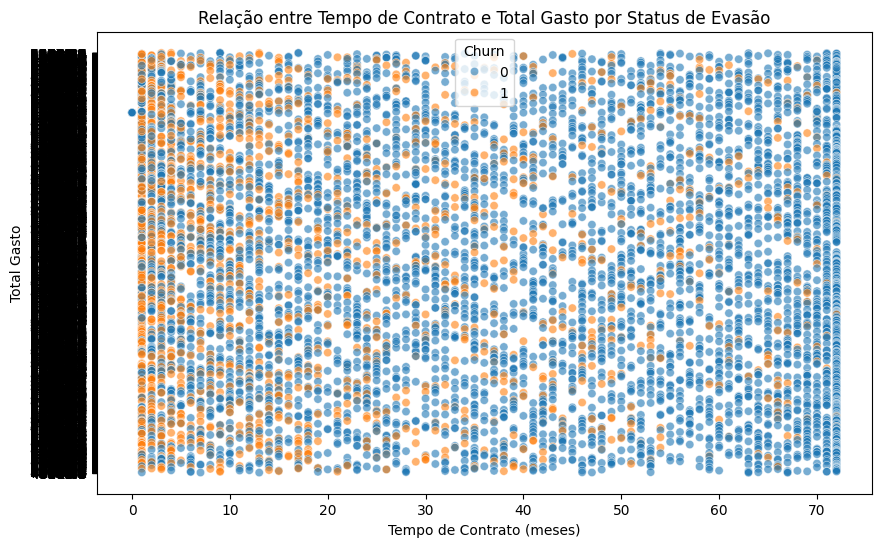

In [74]:
# Boxplot: Total Charges vs Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='account.Charges.Total', data=df)
plt.title('Distribuição do Total Gasto por Status de Evasão')
plt.xlabel('Evasão (Churn)')
plt.ylabel('Total Gasto')
plt.show()

# Scatter plot: tenure vs Total Charges colorido por Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='customer.tenure', y='account.Charges.Total', hue='Churn', data=df, alpha=0.6)
plt.title('Relação entre Tempo de Contrato e Total Gasto por Status de Evasão')
plt.xlabel('Tempo de Contrato (meses)')
plt.ylabel('Total Gasto')
plt.show()


#### c) Análise de outras variáveis importantes

Vamos verificar outras variáveis que mostraram alta correlação:


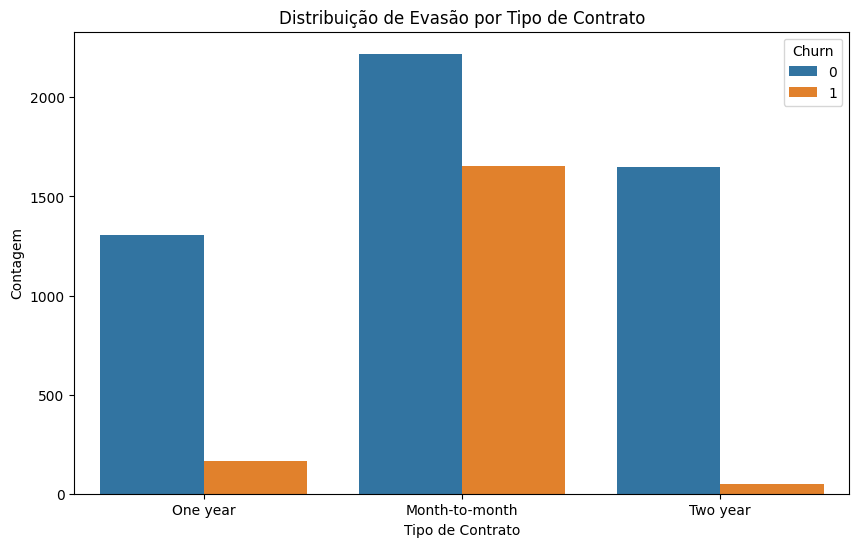

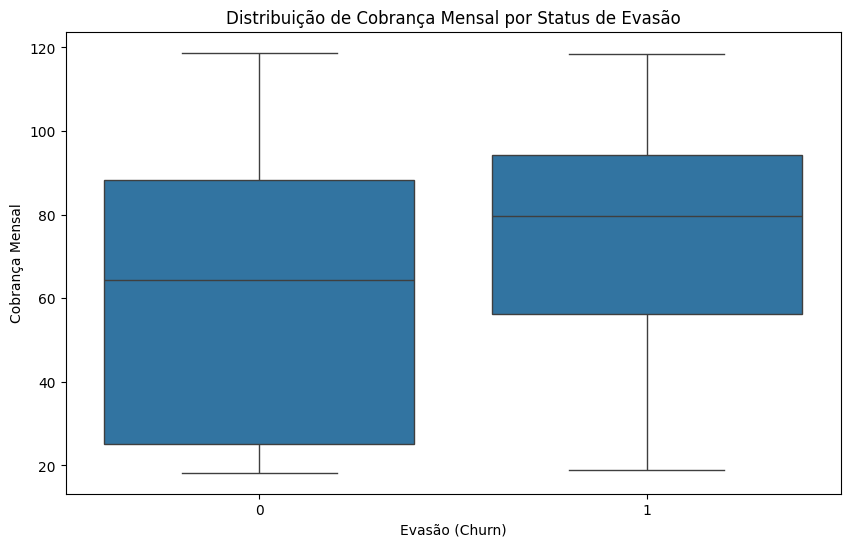

In [75]:
# Exemplo para Contract Type
plt.figure(figsize=(10, 6))
sns.countplot(x='account.Contract', hue='Churn', data=df)
plt.title('Distribuição de Evasão por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Contagem')
plt.show()

# Exemplo para Monthly Charges
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='account.Charges.Monthly', data=df)
plt.title('Distribuição de Cobrança Mensal por Status de Evasão')
plt.xlabel('Evasão (Churn)')
plt.ylabel('Cobrança Mensal')
plt.show()